## 注意

- このnotebookを実行する前に，このnotebookをGoogle Driveに保存してください．
- 方法は[第1週の学習用notebook](https://colab.research.google.com/github/yyamnk/numerical-methods-py3/blob/master/exp_python1.ipynb)を参照すること

# 運動方程式の解を用いた質点の運動解析

このNotebookでは，簡単な質点の運動をシミュレーションしてみよう．

まず，次の運動を考える．

- 高さ$H$[m]のビルから，質量$m$[kg]の物体を水平方向に初速$v_o$[m/s]で投げ出す．
- 質点の高さを$y$[m], ビルからの距離を$x$[m]とする．

このときの質点の運動をPythonでシミュレーションしてみよう．

## 運動方程式の解を求める

シミュレーションの方法は複数あるが，まずは運動方程式の解を求めて，これをplotしてみよう．

### $y$方向の運動方程式

まず，$y$方向の運動方程式を考える．
質点には，重力加速度$g$が働くため，
$$
m \frac{d^2 y(t)}{dt^2} = F = mg \Leftrightarrow \frac{d^2 y(t)}{dt^2} = -g
$$
となる．これを積分すると，
$$
\frac{d y(t)}{dt} = \int - g \ dt = -gt + C_{y1}
$$
になる．ただし，$C_{y1}$は積分定数であり，$y$方向の初速度より$C_{y1} = 0$となる．
さらに積分すると，
$$
y(t) = \int -gt \ dt = -\frac{1}{2}gt^2 + C_{y2}
$$
になる．
ただし，$C_{y2}$は積分定数で，$y$方向の初期位置より$C_{y2} = H$である．

よって，$y$方向の運動方程式の解は，
$$
y(t) = -\frac{1}{2}gt^2 + H
\tag{1}
$$
となる．

### $x$方向の運動方程式

次に，$x$方向を考えると，外力がゼロであるから，
$$
m \frac{d^2 x(t)}{dt^2} = 0
$$
となる．これを積分して，
$$
\frac{d x(t)}{dt} = \int 0 \ dt = C_{x1}
$$
になる．$C_{x1}$は積分定数であり，$x$方向の初速度より$C_{x1} = v_0$となる．
これを積分して，
$$
x(t) = \int v_0 \ dt = v_0 t + C_{x2}
$$
$C_{x2}$は積分定数であり，$x$方向の初速度より$C_{x2} = 0$である．

よって，$x$方向の運動方程式の解は，
$$
x(t) = v_0 t
\tag{2}
$$
となる．

## 運動方程式の解をplotする

上記の式(1)(2)をPythonの関数で実装すると，次のようになる．

In [1]:
def get_xy(t, H, v0, g):
    y = -g * t**2 /2 + H
    x = v0 * t
    return x,y

この関数を使って，質点の運動をplotしてみよう．
条件は次のとおり
- plotする時刻$t$の範囲と刻み：0 [s] から10 [s]まで 0.1[s]刻み
- $H = 333$ [m]
- $g = 9.8$ [m/s^2]
- $v_0 = 30$ [m/s]

<font color="red">
（TODO）実装した関数を使って，t = 0[s]と0.1[s]の$x$[m]と$y$[m]を求めよ
</font>

In [2]:
H = 333
v0 = 30
g = 9.8

x0, y0 = get_xy(0, H, v0, g)
print(x0)
print(y0)

0
333.0


In [3]:
x01, y01 = get_xy(0.1, H, v0, g)
print(x01)
print(y01)

3.0
332.951


<font color="red">
（TODO）numpy配列とfor文を使って，離散時刻の配列であるts, 各離散時刻の$x(t)$[m]と$y(t)$[m]を表すxs, ysを計算せよ．
</font>

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
ts = np.arange(start=0, stop=10, step=0.1)
xs = np.zeros(len(ts))
ys = np.zeros(len(ts))

for i in range(0, len(ts)):
    t = ts[i]
    xs[i], ys[i] = get_xy(t, H, v0, g)

In [6]:
xs

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
        33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
        99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
       132., 135., 138., 141., 144., 147., 150., 153., 156., 159., 162.,
       165., 168., 171., 174., 177., 180., 183., 186., 189., 192., 195.,
       198., 201., 204., 207., 210., 213., 216., 219., 222., 225., 228.,
       231., 234., 237., 240., 243., 246., 249., 252., 255., 258., 261.,
       264., 267., 270., 273., 276., 279., 282., 285., 288., 291., 294.,
       297.])

In [7]:
ys

array([ 333.   ,  332.951,  332.804,  332.559,  332.216,  331.775,
        331.236,  330.599,  329.864,  329.031,  328.1  ,  327.071,
        325.944,  324.719,  323.396,  321.975,  320.456,  318.839,
        317.124,  315.311,  313.4  ,  311.391,  309.284,  307.079,
        304.776,  302.375,  299.876,  297.279,  294.584,  291.791,
        288.9  ,  285.911,  282.824,  279.639,  276.356,  272.975,
        269.496,  265.919,  262.244,  258.471,  254.6  ,  250.631,
        246.564,  242.399,  238.136,  233.775,  229.316,  224.759,
        220.104,  215.351,  210.5  ,  205.551,  200.504,  195.359,
        190.116,  184.775,  179.336,  173.799,  168.164,  162.431,
        156.6  ,  150.671,  144.644,  138.519,  132.296,  125.975,
        119.556,  113.039,  106.424,   99.711,   92.9  ,   85.991,
         78.984,   71.879,   64.676,   57.375,   49.976,   42.479,
         34.884,   27.191,   19.4  ,   11.511,    3.524,   -4.561,
        -12.744,  -21.025,  -29.404,  -37.881,  -46.456,  -55.

<font color="red">
（TODO）tsを横軸，xsを縦軸とし，質点の水平方向の変位をplotせよ
</font>

Text(0, 0.5, 'x [m]')

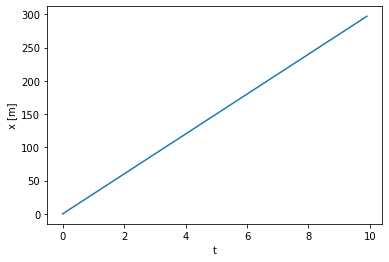

In [8]:
plt.plot(ts, xs)
plt.xlabel('t')
plt.ylabel('x [m]')

<font color="red">
（TODO）tsを横軸，ysを縦軸とし，質点の垂直方向の変位をplotせよ
</font>

Text(0, 0.5, 'y [m]')

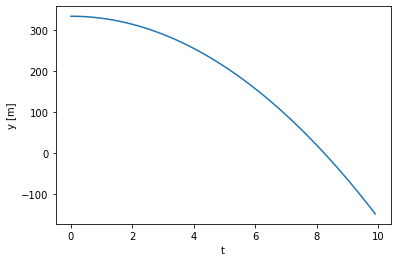

In [9]:
plt.plot(ts, ys)
plt.xlabel('t')
plt.ylabel('y [m]')

<font color="red">
（TODO）xsを横軸，ysを縦軸とし，質点の運動をplotせよ
</font>

Text(0, 0.5, 'y [m]')

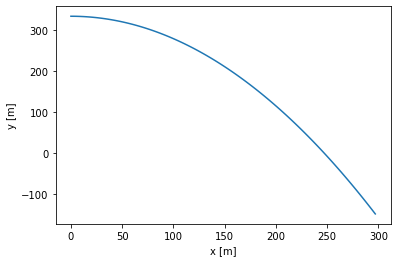

In [10]:
plt.plot(xs, ys)
plt.xlabel('x [m]')
plt.ylabel('y [m]')